# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : pilar
Processing Record 2 of Set 1 : sennoy
City not found. Skipping...
Processing Record 3 of Set 1 : longyearbyen
Processing Record 4 of Set 1 : valparaiso
Processing Record 5 of Set 1 : busselton
Processing Record 6 of Set 1 : hermanus
Processing Record 7 of Set 1 : la romana
Processing Record 8 of Set 1 : cermik
Processing Record 9 of Set 1 : hobart
Processing Record 10 of Set 1 : agirish
Processing Record 11 of Set 1 : jamestown
Processing Record 12 of Set 1 : punta arenas
Processing Record 13 of Set 1 : tasiilaq
Processing Record 14 of Set 1 : carnarvon
Processing Record 15 of Set 1 : dawlatabad
Processing Record 16 of Set 1 : san patricio
Processing Record 17 of Set 1 : bilibino
Processing Record 18 of Set 1 : qaanaaq
Processing Record 19 of Set 1 : belyy yar
Processing Record 20 of Set 1 : kapaa
Processing Record 21 of Set 1 : rikitea
Processing Record 22 of Set 1 : fremont
Processing Record 

Processing Record 33 of Set 4 : saint-michel-des-saints
Processing Record 34 of Set 4 : healesville
Processing Record 35 of Set 4 : chase
Processing Record 36 of Set 4 : chokurdakh
City not found. Skipping...
Processing Record 37 of Set 4 : duartina
Processing Record 38 of Set 4 : lazarev
Processing Record 39 of Set 4 : codrington
Processing Record 40 of Set 4 : deputatskiy
Processing Record 41 of Set 4 : faya
Processing Record 42 of Set 4 : padang
Processing Record 43 of Set 4 : victor harbor
Processing Record 44 of Set 4 : tarakan
City not found. Skipping...
Processing Record 45 of Set 4 : yar-sale
Processing Record 46 of Set 4 : osoyoos
Processing Record 47 of Set 4 : rincon
Processing Record 48 of Set 4 : fort morgan
Processing Record 49 of Set 4 : gonbad-e qabus
Processing Record 50 of Set 4 : bathsheba
Processing Record 0 of Set 5 : sistranda
Processing Record 1 of Set 5 : belaya gora
Processing Record 2 of Set 5 : aklavik
Processing Record 3 of Set 5 : ati
Processing Record 4 of

Processing Record 16 of Set 8 : kavieng
Processing Record 17 of Set 8 : iqaluit
Processing Record 18 of Set 8 : dublin
Processing Record 19 of Set 8 : ibicui
Processing Record 20 of Set 8 : yaan
Processing Record 21 of Set 8 : rudkobing
Processing Record 22 of Set 8 : ilanskiy
Processing Record 23 of Set 8 : walvis bay
Processing Record 24 of Set 8 : nuuk
Processing Record 25 of Set 8 : gat
Processing Record 26 of Set 8 : alappuzha
Processing Record 27 of Set 8 : caravelas
City not found. Skipping...
Processing Record 28 of Set 8 : lakes entrance
Processing Record 29 of Set 8 : pipili
City not found. Skipping...
Processing Record 30 of Set 8 : san quintin
Processing Record 31 of Set 8 : korla
Processing Record 32 of Set 8 : santa cruz
Processing Record 33 of Set 8 : miranda
Processing Record 34 of Set 8 : muhos
Processing Record 35 of Set 8 : lavrentiya
Processing Record 36 of Set 8 : san pedro
Processing Record 37 of Set 8 : port lincoln
Processing Record 38 of Set 8 : vengerovo
Proce

Processing Record 48 of Set 11 : fukue
City not found. Skipping...
Processing Record 49 of Set 11 : floro
Processing Record 50 of Set 11 : nabha
Processing Record 0 of Set 12 : beitbridge
Processing Record 1 of Set 12 : muroto
Processing Record 2 of Set 12 : goderich
Processing Record 3 of Set 12 : shagonar
Processing Record 4 of Set 12 : manggar
Processing Record 5 of Set 12 : saint-pierre
Processing Record 6 of Set 12 : tamiahua
Processing Record 7 of Set 12 : iskateley
Processing Record 8 of Set 12 : kushima
Processing Record 9 of Set 12 : cerrito
Processing Record 10 of Set 12 : mangrol
Processing Record 11 of Set 12 : yerbogachen
City not found. Skipping...
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_weather_df = pd.DataFrame({"City":city_name,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Humidity":humidity,
                        "Cloudiness":cloudiness,
                        "Wind Speed":wind_speed,
                        "Country":country, 
                        "Date":date, 
                                       })
city_weather_df = city_weather_df.rename_axis('')

#Exporting data to csv
city_weather_df.to_csv("output_data/city.csv")

#Displaying dataframe
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
,,,,,,,,,
0,Pilar,-9.5972,-35.9567,75.13,71,97,4.38,BR,1647949535
1,Sennoy,52.1509,46.9631,33.35,94,21,7.92,RU,1647949536
2,Longyearbyen,78.2186,15.6401,17.44,62,75,20.71,SJ,1647949537
3,Valparaíso,-33.0393,-71.6273,59.47,69,0,3.44,CL,1647949329
4,Busselton,-33.6500,115.3333,63.41,59,1,18.25,AU,1647949538


In [7]:
percentage = [.25,.50,.75]

city_weather_summary = city_weather_df.describe(percentiles = percentage)
city_weather_summary.to_csv(f'output_data\city_weather_summary.csv', index = False)

city_weather_summary

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,21.413116,21.621558,56.094073,69.795455,58.012238,8.995909,1.647950e+09
std,33.316783,90.670492,26.965572,22.823969,39.325774,5.818107,1.372975e+02
min,-54.800000,-175.200000,-27.380000,1.000000,0.000000,0.000000,1.647949e+09
25%,-6.425700,-61.443775,35.970000,59.000000,20.000000,4.500000,1.647950e+09
50%,28.366800,29.789300,60.810000,76.000000,70.000000,7.990000,1.647950e+09
75%,48.716600,100.340125,78.262500,87.000000,99.000000,12.540000,1.647950e+09
max,78.218600,179.316700,105.310000,100.000000,100.000000,32.230000,1.647950e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_df = city_weather_df[(city_weather_df['Humidity'] > 100)]
humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
,,,,,,,,,


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

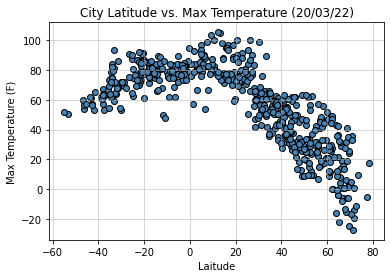

In [11]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (20/03/22)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("output_data/City Latitude vs Max Temperature.png")

### Latitude vs. Temperature Plot show the relationship between latitude and temperature. Which means as you closer to equator line the temperature gets hotter.

## Latitude vs. Humidity Plot

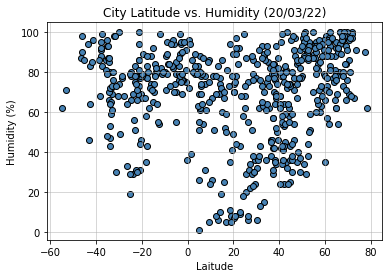

In [12]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (20/03/22)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("output_data/City Latitude vs Humidity.png")

### Latitude vs. Humidity Plot show the relationship between latitude and humidity. It shows that the humidity is more consistent with higher latitudes.

## Latitude vs. Cloudiness Plot

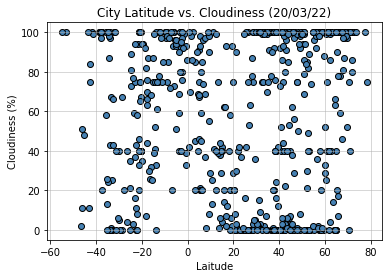

In [13]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (20/03/22)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("output_data/City Latitude vs Cloudiness.png")

### Latitude vs. Cloudiness Plot show a radom relationship between latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

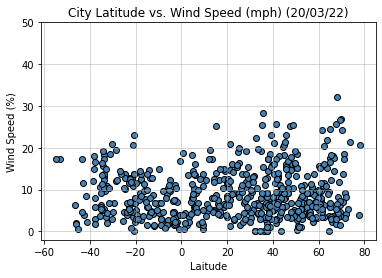

In [14]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (20/03/22)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("output_data/City Latitude vs Wind Speed (mph).png")

### Latitude vs. Wind Speed Plot show the relationship between latitude and wind speed. As Farther away from the equator (latitude 0), thewind speeds will be generally greater.

## Linear Regression

In [15]:
Northern_hemisphere_df = city_weather_df.loc[city_weather_df["Lat"]>=0]
Northern_hemisphere_df.to_csv("output_data/Northern_hemisphere.csv")
Northern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
,,,,,,,,,
1,Sennoy,52.1509,46.9631,33.35,94,21,7.92,RU,1647949536
2,Longyearbyen,78.2186,15.6401,17.44,62,75,20.71,SJ,1647949537
6,La Romana,18.4273,-68.9728,70.16,94,20,5.75,DO,1647949539
7,Çermik,38.1361,39.4493,43.47,76,76,7.45,TR,1647949540
9,Agirish,61.9247,63.0231,25.47,95,100,10.38,RU,1647949542
...,...,...,...,...,...,...,...,...,...
567,Iskateley,67.6803,53.1512,27.59,78,97,25.77,RU,1647949949
568,Kushima,31.4583,131.2333,54.07,76,100,11.81,JP,1647949949
569,Cerrito,6.8432,-72.6940,53.92,87,74,4.76,CO,1647949950


In [16]:
Southern_hemisphere_df = city_weather_df.loc[city_weather_df["Lat"]<0]
Southern_hemisphere_df.to_csv("output_data/Southern_hemisphere.csv")
Southern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
,,,,,,,,,
0,Pilar,-9.5972,-35.9567,75.13,71,97,4.38,BR,1647949535
3,Valparaíso,-33.0393,-71.6273,59.47,69,0,3.44,CL,1647949329
4,Busselton,-33.6500,115.3333,63.41,59,1,18.25,AU,1647949538
5,Hermanus,-34.4187,19.2345,78.80,70,99,15.73,ZA,1647949539
8,Hobart,-42.8794,147.3294,57.06,83,75,11.50,AU,1647949541
...,...,...,...,...,...,...,...,...,...
552,Itarantim,-15.6597,-40.0656,77.95,71,25,7.09,BR,1647949937
553,Kawalu,-7.3817,108.2082,74.32,94,100,0.78,ID,1647949938
560,Beitbridge,-22.2167,30.0000,85.01,30,0,11.74,ZW,1647949944


In [17]:
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression_values = x * slope + intercept
    print(f"The r-value is : {rvalue**2}")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regression_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.7432984137671047


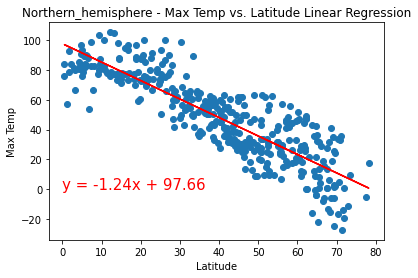

In [18]:
equation = linear_regression(Northern_hemisphere_df["Lat"], Northern_hemisphere_df["Max Temp"])
annotate(equation, 0, 0)
plt.title("Northern_hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression show that there is strong negative linear relationship betwen Max Temp and Latitude. When one variable increases while the other variable decreases(temp), a negative linear relationship exists.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.2938596668993947


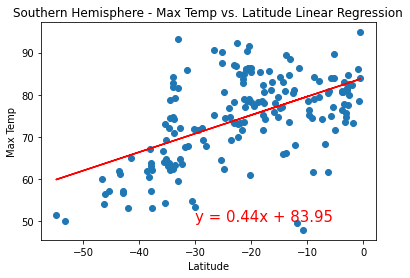

In [19]:
equation = linear_regression(Southern_hemisphere_df["Lat"],Southern_hemisphere_df["Max Temp"])
annotate(equation, -30, 50)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression , I found that there is a positive linear relationship, because both variables increase or decrease concurrently and at a constant rate, this case (Temp vs. Latitude).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.13374684702770037


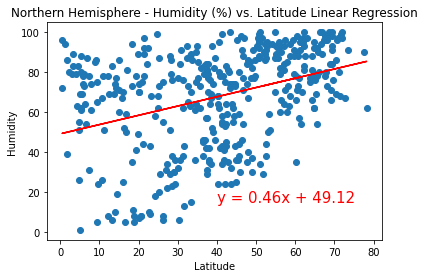

In [20]:
equation = linear_regression(Northern_hemisphere_df["Lat"], Northern_hemisphere_df["Humidity"])
annotate(equation, 40, 15)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression show us that meaning in the Northern Hemisphere as you get further away from the equator (latitude 0) humidity increases.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.005469474217211529


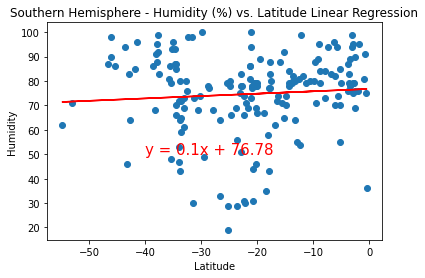

In [21]:
equation = linear_regression(Southern_hemisphere_df["Lat"], Southern_hemisphere_df["Humidity"])
annotate(equation, -40, 50)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression there does not seem to be a very strong correlation a slight negative correlation in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.04677082368318762


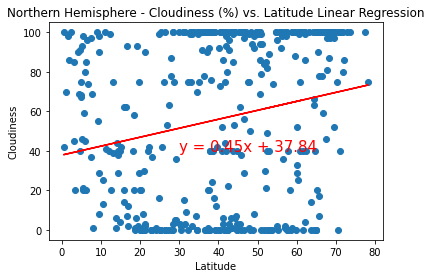

In [22]:
equation = linear_regression(Northern_hemisphere_df["Lat"], Northern_hemisphere_df["Cloudiness"])
annotate(equation, 30, 40)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression There does not seem to be much correlation . However, when the linear regression is performed, you can see that there is a slight positive correlation in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.05426206021558235


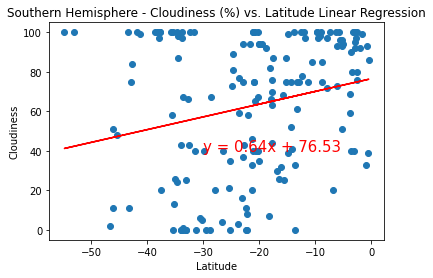

In [23]:
equation = linear_regression(Southern_hemisphere_df["Lat"], Southern_hemisphere_df["Cloudiness"])
annotate(equation, -30, 40)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression there is a strong negative correlation in the Southern Hemisphere. it shows that the further you are from the equator (latitude 0) the less cloudy it is.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.00365169429185221


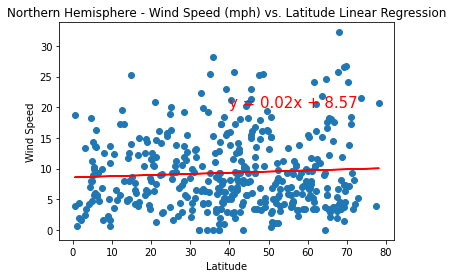

In [24]:
equation = linear_regression(Northern_hemisphere_df["Lat"], Northern_hemisphere_df["Wind Speed"])
annotate(equation, 40, 20)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression shows a much lower correlation. There does seem to be a pretty strong correlation between wind sped and latitude when you look at the plots.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.08102397955170429


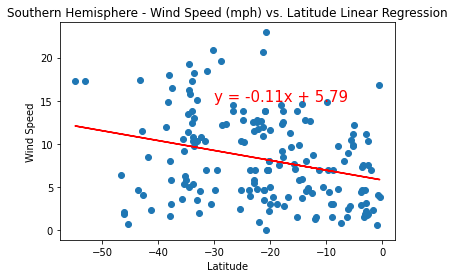

In [25]:
equation = linear_regression(Southern_hemisphere_df["Lat"], Southern_hemisphere_df["Wind Speed"])
annotate(equation, -30, 15)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression there is negative linear relationship. but not as strong.